# Assignment: Clustering and Association

## I. Business Understanding

The client is a drone delivery company that is looking for a way to optimize its operations. The company has a fleet of drones that deliver products to customers and intends to create a set of hubs or depots, where the drones are stationed, serviced, and loaded with products for delivery. The company is looking to optimize its operations by finding the optimal locations for its hubs.

Another optimization idea is to increase the revenue of the company by recommending products to customers based on their purchase history. Using association rule mining, the goal is to identify relationships between different product groups to recommend relevant products to customers and drive sales.

---

## II. Data Understanding

The analysis utilizes two datasets [drone_cust_locations.csv](https://github.com/vesavvo/dkko/blob/main/datasets/drone_delivery/drone_cust_locations.csv) and [drone_prod_groups.csv](https://github.com/vesavvo/dkko/blob/main/datasets/drone_delivery/drone_prod_groups.csv) provided by [Vesa Ollikainen](https://github.com/vesavvo).

drone_cust_locations.csv dataset contains the locations of customers. The dataset has the following columns:
- ```client_id``` -> Identifier for customer
- ```x``` -> The x coordinate of the customer's location, when plotted into a 2D plane
- ```y``` -> The y coordinate of the customer's location, when plotted into a 2D plane

drone_prod_groups.csv dataset contains the sales data for products. The dataset has the following columns:
- ```ID``` -> Transaction id
- ```Prod1, ..., Prod20``` -> Binary variables indicating whether at least one product from a particular group was purchased in the transaction. A value of 1 indicates that at least one product from the group was purchased, while a value of 0 indicates that no products from the group were purchased.

The datasets have no missing values.


In [1]:
import pandas as pd

# Import dataset Drone cust locations
df = pd.read_csv('../data/drone_cust_locations.csv', sep=';')
# Import dataset Drone production groups
df2 = pd.read_csv('../data/drone_prod_groups.csv')

## III. Data Preparation
### Client Locations and Initial Visualization

- **Drone curst locations:** We drop the ```clientid``` column from drone_cust_location dataset and prepare scatterplot figure from it.
- **Product groups:** The mlextend library requires the data to be in boolean format before applying the Apriori algorithm. We can drop the ```ID``` column, as it is not needed for the analysis.

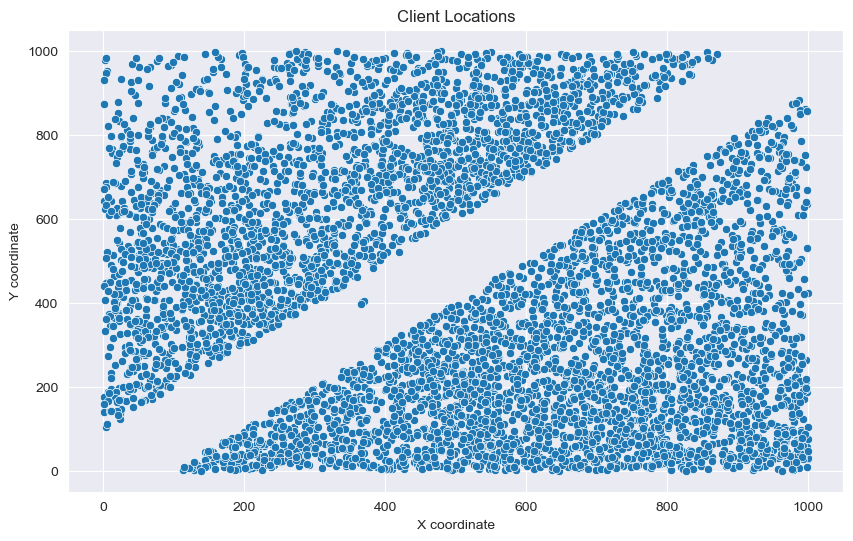

Figure 1: Coordinate data visualized to two dimensional scatterplot.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

# Drop client id and product id columns
df = df.drop(columns='clientid')
df2 = df2.drop(columns='ID')

# Convert integers to booleans
df2 = df2.astype(bool)

# Visualize coordinate data
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['x'], y=df['y'])
plt.title('Client Locations')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()
print("Figure 1: Coordinate data visualized to two dimensional scatterplot.")

**Observation:** Looking at the data points, there seems to be almost like a road or a river, or some other obstacle separating them.

---

## IV. Modeling
### Finding optimal hub locations using K-Means

We first choose an initial number of depots (3) and fit a K-Means clustering model:

In [3]:
# Choosing the number of clusters (depots). You may change this value depending on how many depots you want.
n_clusters = 3

# Fitting K-Means model with data
model = KMeans(init='random', n_clusters=n_clusters, random_state=43)
model.fit(df)

KMeans(init='random', n_clusters=3, random_state=43)

In [4]:
# Get the cluster labels and centroids
labels = model.labels_
centroids = model.cluster_centers_

# Attach the closest depot information to each client
df['depot'] = labels

**Sample output:** First 10 rows of the dataset with depot information:

In [5]:
# Print sample of dataset with depot information included
print(df.head(10))

            x           y  depot
0  622.771572  164.857623      2
1  416.357298  630.193634      0
2  292.735020  567.333231      1
3  737.211288  166.225676      2
4  540.475375  682.912298      0
5  535.469492  318.439661      2
6  640.380050  870.833221      0
7  235.772075  359.048203      1
8  481.896884  661.491838      0
9  730.032789  312.177817      2


The columns x and y are the original data points' coordinates.

The depot column shows the cluster label assigned by the K-Means algorithm, indicating the closest depot for each data point.

 This can be used to determine the optimal location of the depots and how to assign locations to each one.

##### Visualization of depots and clients

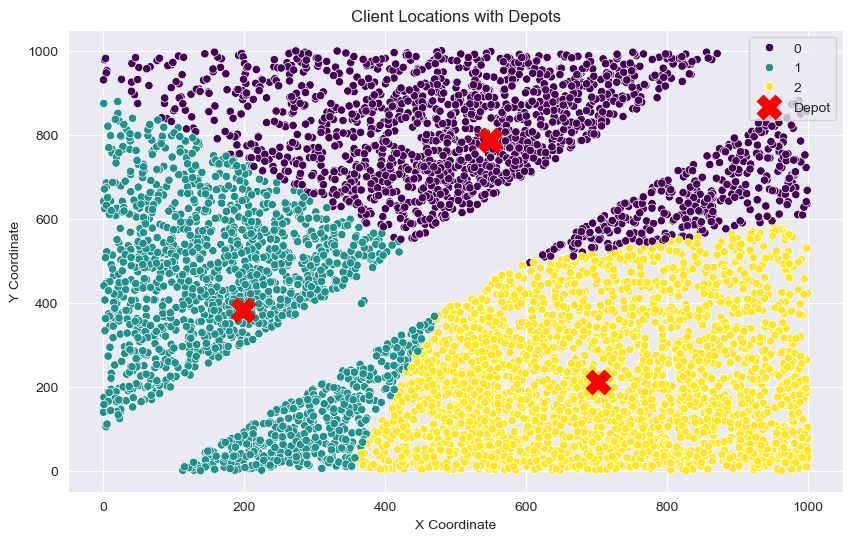

Figure 2: Scatterplot of clients colored by their depot and X serving as an optimal location for depot


In [6]:
# Visualization of datapoints colored by their cluster in scatterplot with cluster centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['x'], y=df['y'], hue=df['depot'], palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Depot')
plt.title('Client Locations with Depots')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()
print("Figure 2: Scatterplot of clients colored by their depot and X serving as an optimal location for depot")

### Finding frequent itemsets in product groups
#### Association rule mining with Apriori

The Apriori algorithm is used in association rule mining to find frequent itemsets.

In [7]:
# Find frequent itemsets
frequent_itemsets = apriori(df2, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.10998,(Prod1)
1,0.13098,( Prod2)
2,0.10459,( Prod5)
3,0.13499,( Prod7)
4,0.16179,( Prod8)
5,0.19853,( Prod9)
6,0.10848,( Prod11)
7,0.15971,( Prod12)
8,0.14557,( Prod14)
9,0.11880,( Prod15)


The code finds frequent itemsets (individual products) in df2 based on a minimum support of 0.1.

## V. Evaluation


#### Experimenting with Different Depot Numbers

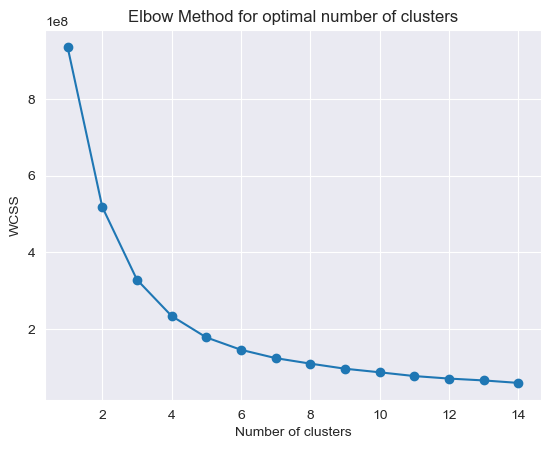

Figure 3: Inertia of clustering or within-cluster sum of squared distances WCSS


In [8]:
import matplotlib.pyplot as plt

# Clustered dataset with different k values
wcss = []
for i in range(1,15):
    model = KMeans(init='random', n_clusters=i, random_state=45).fit(df)
    wcss.append(model.inertia_)

# Visualize inertia (WCSS) for different amounts of clusters (Elbow method)
plt.plot(range(1,15), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for optimal number of clusters')
plt.show()
print("Figure 3: Inertia of clustering or within-cluster sum of squared distances WCSS")

From **Figure 3**, we can see that the optimal number of depots would be 4 or 5.

##### Evaluation of K-Means clustering model fitting times

In [19]:
import time

# Function to fit k-means and measure computation time
def fit_kmeans(clusters):
    start_time = time.time()
    mod = KMeans(init='random', n_clusters=clusters, random_state=42)
    mod.fit(df)
    end_time = time.time()
    return end_time - start_time

# Test with different number of depots
for n in [3, 5, 10]:
    duration = fit_kmeans(n)
    print(f'Number of depots (K-Means): {n}, Computation time: {duration:.4f} seconds')

Number of depots (K-Means): 3, Computation time: 0.0781 seconds
Number of depots (K-Means): 5, Computation time: 0.0702 seconds
Number of depots (K-Means): 10, Computation time: 0.0778 seconds


From the print above, we can see the computational time for 3, 5 and 10 depots. We noticed that the computation time varies a lot, but it is usually shortest with 5 clusters and highest with 10 clusters.

##### Evaluation of Hierarchical clustering model fitting times

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Function to fit agglomerative hierarchical clustering and measure computation time
def fit_agglomerative(clusters):
    start_time = time.time()
    mod = AgglomerativeClustering(n_clusters=clusters)
    label = mod.fit_predict(df)
    end_time = time.time()
    return label, end_time - start_time

# Test with different number of depots
for n in [3, 5, 10]:
    labels, duration = fit_agglomerative(n)
    print(f'Number of depots (Hierarchical): {n}, Computation time: {duration:.4f} seconds')

Number of depots (Hierarchical): 3, Computation time: 0.9051 seconds
Number of depots (Hierarchical): 5, Computation time: 1.1692 seconds
Number of depots (Hierarchical): 10, Computation time: 1.0262 seconds


From the print above, we can see the computational times for fitting the hierarchical clustering model with 3, 5 and 10 clusters (depots). The results indicate that fitting is slowest with 3 clusters compared to 5 and 10. However, the results vary a lot.

##### **Comparison:** K-Means and Hierarchical Clustering

**K-Means:** Computationally efficient and suitable for large datasets but requires a predefined number of clusters. Our results show that computation time is consistently lower than hierarchical clustering. The fastest execution occurred with 5 clusters, while 3 and 10 clusters had slightly longer times.
The variation in computation time might be due to the specific distribution of data points, which can affect how quickly the algorithm converges. Some configurations of centroids may lead to faster convergence for certain numbers of clusters.

**Hierarchical Clustering (Agglomerative):** Also requires a predefined number of clusters in this implementation. However, it is computationally more expensive than K-Means, as seen in our tests. The slowest execution occurred with 3 clusters, while 5 and 10 clusters took slightly longer. This suggests that the merging process in hierarchical clustering is influenced by the number of clusters, but overall, it remains slower than K-Means.

K-Means is more scalable and practical for large datasets, as it is faster than hierarchical clustering in our tests. However, hierarchical clustering provides a structured merging process that may be useful for understanding cluster relationships, despite its higher computational cost.

##### Silhouette scores for K-Means model in range of 2 to 10 clusters

In [21]:
from sklearn.metrics import silhouette_score

# Silhouette score

for n in range(2, 11):
    model = KMeans(init='random', n_clusters=n, random_state=42).fit(df)
    labels = model.labels_
    print(f'Silhouette score for {n} clusters = %.2f' % silhouette_score(df, labels))

Silhouette score for 2 clusters = 0.42
Silhouette score for 3 clusters = 0.42
Silhouette score for 4 clusters = 0.40
Silhouette score for 5 clusters = 0.42
Silhouette score for 6 clusters = 0.40
Silhouette score for 7 clusters = 0.39
Silhouette score for 8 clusters = 0.39
Silhouette score for 9 clusters = 0.39
Silhouette score for 10 clusters = 0.37


Silhouette scores and WCSS (Figure 3) suggest that the optimal number of depots is 5.

##### Fitting model with optimal number of clusters

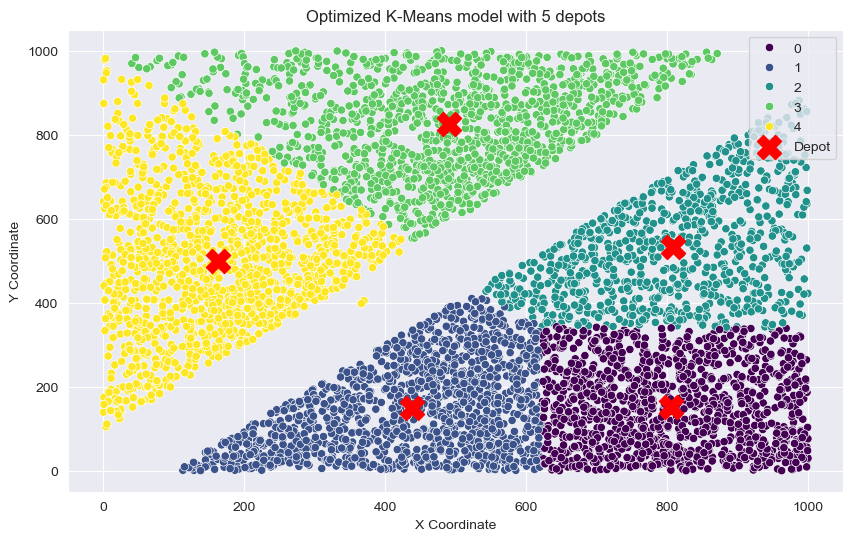

Figure 4: Scatterplot of optimized K-Means model fitted with 5 clusters and cluster centroids


In [12]:
model = KMeans(init='random', n_clusters=5, random_state=43)
model.fit(df)
labels = model.labels_
centroids = model.cluster_centers_
df['depot'] = labels

# Final visualization of optimized K-Means model with 5 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['x'], y=df['y'], hue=df['depot'], palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Depot')
plt.title('Optimized K-Means model with 5 depots')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()
print('Figure 4: Scatterplot of optimized K-Means model fitted with 5 clusters and cluster centroids')

After comparing different cluster numbers, we selected 5 clusters as the optimal choice. The K-Means model is trained with ```n_clusters=5```, and the resulting cluster labels are assigned to the dataset. The final visualization (Figure 4) presents the clustered data, where:

- Each point represents a data entry, colored by its assigned cluster (depot).
- The red "X" markers indicate the centroids of each cluster.

### Finding interesting relationships between product groups

In this part, we use association rule mining to find interesting relationships between products. The goal is to identify rules that reveal which products are frequently purchased together.

In [13]:
# generate association rules for products
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# sort in descending order of confidence
rules = rules.sort_values(by='confidence', ascending=False)
print(rules.head(10))

  antecedents consequents  antecedent support  consequent support  support  \
0   ( Prod15)    ( Prod9)             0.11880             0.19853  0.11145   
3   ( Prod20)   ( Prod19)             0.14798             0.20626  0.13476   
2   ( Prod19)   ( Prod20)             0.20626             0.14798  0.13476   
1    ( Prod9)   ( Prod15)             0.19853             0.11880  0.11145   

   confidence      lift  representativity  leverage  conviction  \
0    0.938131  4.725388               1.0  0.087865   12.954372   
3    0.910664  4.415125               1.0  0.104238    8.884845   
2    0.653350  4.415125               1.0  0.104238    2.457869   
1    0.561376  4.725388               1.0  0.087865    2.009011   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.894663  0.541335   0.922806    0.749754  
3       0.907849  0.613997   0.887449    0.782007  
2       0.974508  0.613997   0.593144    0.782007  
1       0.983664  0.541335   0.502243    0.749754  


We used the ```association_rules``` function to analyze the relationships between products purchased together. The analysis used confidence as the metric, which tells us how likely customers are to buy a second product if they purchase the first product.

**Confidence** is the likelihood that the consequent (the product that is likely to be purchased as a result) is purchased if the antecedent (the product being considered as the condition) is purchased. This metric indicates the strength of the association.

- For example, if a rule is that customers who buy Prod15 are likely to also buy Prod9 with 93.81% confidence (0.9381), this indicates a strong relationship between these products.

**Lift** is a metric that tells how many times more likely the items are to be purchased together than if they were independent.

- Products {15, 9} have a lift of 4.73, meaning the chance of buying Prod9 with Prod15 is 4.73 times higher than buying Prod9 without Prod15.

**Support** is the proportion of transactions where both the antecedent and consequent appear together. This tells us how often the rule occurs overall.

- Support is 0.11145 between Prod15 and Prod9, and that indicates how frequently this pair is together in the dataset.

This is the expected data for association rule mining, providing insights into the relationships between products based on customer buying behavior. These rules can be used to recommend products together, create marketing strategies, and improve sales.

## VI. Deployment

The optimized K-Means model with 5 clusters will perform well and can be deployed to optimize the drone delivery operations.

#### Recommendations for the company

Based on the results of the analysis, the company could use the following recommendations to increase revenue:

- Since the purchase of certain products is associated with others, the company should offer combo deals containing for example {Prod 15, Prod 9}, by bundling these products.

- Products that frequently appear together could be good for discounted bundles. For example, Prod15 and Prod9 could be a part of a special offer, like "Buy Prod15 and get Prod9 at half price".
- Place these products near each other to make joint purchases more convenient. If certain product categories are often purchased together, the company could group these products together in a store or present them together on a website.

Association rule mining provides insights into customer purchasing behavior, and it can be used to tailor marketing efforts more effectively. By leveraging this information, the company can implement these strategies to increase sales and customer loyalty.